
**El método de Newton**

Recordemos que el método de Newton es un método numérico iterativo para encontrar raíces de funciones (continuamente) diferenciables.

Sea f la función cuyas raíces queremos encontrar. La idea es que empecemos desde una adivinanza inicial $x_0$, y que la siguiente aproximación $x_1$ esté donde la recta tangente a la curva $f(x)$ en $x_0$ corte el eje $x$.

**[1]** Esboza la geometría, tanto a mano como en la computadora, y así encuentra la expresión de $x_{n+1}$ en términos de $x_n$.

**Soluciones**

Partimos de la ecuacion conocida de una recta:

$y-y_i=m(x-x_i)$

Donde $y=f(x)$, $y_i=f(x_0)$, $x_i=x_0$ y $m=f'(x_0)$

Con lo que obtenemos:

$f(x)-f(x_0)=f'(x_0)(x-x_0)$

A tratarse de una raiz, sabemos que $f(x)=0$ por lo que la expresion queda reducida a:

$-f(x_0)=f'(x_0)(x-x_0)$

Nos interesa conocer el valor de $x$ , despejando:

$x=x_0-f(x_0)/f'(x_0)$

Finalmente escribiendo la notacion en forma iterativa, llegamos a la expresion del metodo de Newton:

$x_{n+1}=x_n-f(x_n)/f'(x_n)$


**[2]** Implementa la iteración para calcular la raíz cuadrada y la raíz cúbica de $2$. ¿Cuál es una condición razonable de terminación del algoritmo?

Primero retomando un poco el metodo de los Babilonios para comparar el resultado con otro metodo

In [2]:
#Metodo babilonico Raiz Cuadrada de 2
x=big(5)
for i=1:100
    x=(x+2/x)/2
end
raiz=x
println("La raiz obtenida es: ",raiz)
er=abs(sqrt(2)-raiz)
println("El error es de: ",er)

La raiz obtenida es: 1.414213562373095048801688724209698078569671875376948073176679737990732478462119e+00
El error es de: 9.667293313452913037187168859825586442682332026200926752153788074814817825053041e-17


In [3]:
#Metodo babilonico Raiz Cubica de 2
x=big(5)
x=x/3
for i=1:100
    x=(1/3)*(2*x+2/(x^2))
end
raiz=x
println("La raiz obtenida es: ",raiz)
er=abs((2)^(1/3)-raiz)
println("El error es de: ",er)

La raiz obtenida es: 1.259921049894873094827542667118789640827158359259903800041946821054872219984269e+00
El error es de: 9.583900169316450691445352706554478369995805317894512778001573092637677469274893e-17


Ahora queremos aplicar Newton en el calculo de la raiz de $2$, para su calculo partimos del siguiente polinomio:

$x^2-2=0$

In [4]:
#Metodo de Newton para la raiz cuadrada de 2 con iteraciones arbitrariamente definidas
x=big(5)
for i=1:10
    x=x-(x^2-2)/(2*x)
end
raiz1=x

1.414213562373095048801688724209698078569671875376948073176679737990732478462102e+00 with 256 bits of precision

Para el calculo de la raiz cubica de $2$ partimos del siguiente polinomio:

$x^3-2=0$

In [5]:
#Metodo de Newton para la raiz cubica de 2 on iteraciones arbitrariamente definidas
x=big(5)
for i=1:10
    x=x-(x^3-2)/(3*x^2)
end
raiz=x

1.259921049894873164767210607278228350570251464701507980081975112155299676514785e+00 with 256 bits of precision

Ambos metodos funcionaron correctamente.

Ahora, cual seria una condicion razonable para la terminacion del algoritmo? Personalmente yo partiria que depende de la presicion del problema con el que estemos trabajando. Sin embargo a nivel programacion una posibilidad seria que itere hasta que la maquina ya no encuentre diferencia entre los puntos que esta encontrando. 

In [6]:
#Metodo de Newton para la raiz cuadrada de 2
x=big(5)
xn=x
err=1
while err >= 1e-10
    xn=x-(x^2-2)/(2*x)
    err=abs(xn-x)
    x=xn
    println(xn)
end
raiz=xn

2.700000000000000000000000000000000000000000000000000000000000000000000000000007e+00
1.720370370370370370370370370370370370370370370370370370370370370370370370370374e+00
1.441455368177650201331579157198102300362795518877327273452138898855798748156119e+00
1.414470981367771002489897732081078004626818681677764865359471489613456276420064e+00
1.414213585796883763046612763594959906821153898169687041913305759284748693050093e+00
1.414213562373095242787195312459616057558464165957223422194763723447978627999712e+00
1.414213562373095048801688724209711382916966903076224562010519471194147205802683e+00


1.414213562373095048801688724209711382916966903076224562010519471194147205802683e+00 with 256 bits of precision

La idea es que el algoritmo termine cuando la precision de la maquina ya no encuentre diferencias entre los dos ultimos puntos evaluados. Tambien puede ser una presicion dada por el usuario dependiendo de la aplicacion.



**[3]** Haz un módulo para llevar a cabo diferenciación automática (usando el código del notebook correspondiente) y utilízalo para implementar el método.

Empezamos probando un metodo donde introducimos tanto la funcion como la derivada.

In [7]:
g(x)=5x^2-9x+1#Es la funcion que vamos a introducir para encontrar su raiz

g (generic function with 1 method)

In [8]:
#Aqui va la funcion inicial donde se tiene que introducir como parametros:
#funcion, derivada, punto inicial, error
function newton1(f,g,x0,err)
    xn=1#Este valor se inicializa en 1 y es el que se utilizara para guardar la "siguiente" iteracion
    x=x0#Aqui cargamos el punto inicial
    errc=1
    while errc >= err#En el ciclo utilizaremos parametro de error introducido, el ciclo se detiene al obtener un error inferior 
        xn=x-f(x)/g(x)#Esta es la iteracion del metodo
        errc=abs(xn-x)#Calculamos el error
        x=xn#Guardamos en x la iteracion obtenida y reiniciamos el ciclo
        println(xn)#Vamos imprimiendo las iteraciones (podria ser un inconveniente)
    end
    raiz=xn#Guarda y despliega la raiz obtenida
end

newton1 (generic function with 1 method)

In [9]:
#Probamos la funcion creada con f(x) y su derivada g(x)
f(x)=x^2-7
g(x)=2x

g (generic function with 1 method)

In [10]:
newton1(f,g,1,0.0001)

4.0
2.875
2.654891304347826
2.6457670441902894
2.6457513111113693


2.6457513111113693

In [11]:
f(2.6457513110645907)#Funciona, arroja algo casi cero, podemos decir que econtro una raiz conuna presicion de 10^-16

8.881784197001252e-16

Ahora vamos a usar el modulo de Derivadas (implementado en el notebook 4) para que el calculo sea automatico, es decir, sin tener que introducir como parametro la derivada.

In [12]:
workspace()

In [13]:
using Derivadas#Cargamos el modulo

In [14]:
f(x::DerValue)=x^2-7#Cargamos la funcion con su argumento

f (generic function with 1 method)

In [15]:
f(DerValue(2,1))#Probamos, funciona!

DerValue(-3,4)

In [16]:
#Va de nuevo la funcion, los parametros solo son la funcion(cuyo argumento es DerValue), punto inicial y error)
function newton2(f,x0,err)
    xn=1#Definimos una variable solo para cargar el el valor de la iteracion calculada
    y=f(DerValue(x0,1))#Cargamos el valor de la funcion y su derivada
    x=x0#Cargamos el valor inicial que le proporcionamos para comenzar las iteraciones
    errc=1#Definimos un error para comparar contra el dado como parametro
    while errc >= err#Inicia el ciclo que correra hasta que el error no sea reducido al valor dado
        xn=x-y.f_v/y.d_v#Ecuacion del metodo de Newton, guaramos la iteracion en xn
        errc=abs(xn-x)#Calculamos el error
        x=xn#Guardamos la iteracion en la variable x para encontrar el siguiente valor
        y=f(DerValue(x,1))#Calculamos de nuevo la funcion y su derivada a partit del punto obtenido
        #println(xn)#Vamos imprimiendo resultados
    end
    raiz=xn#Despliega la raiz obtenida
end

newton2 (generic function with 1 method)

In [17]:
#Lo probamos
f(x::DerValue)=x^2-7
newton2(f,2,0.001)#Funciona

2.6457513110646933

In [18]:
f(DerValue(2.6457513110645907,1))#Al evaluar en f tenemos una raiz con precision de 10^-16 y el valor de su derivada

DerValue(8.881784197001252e-16,5.291502622129181)

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Loading help data...


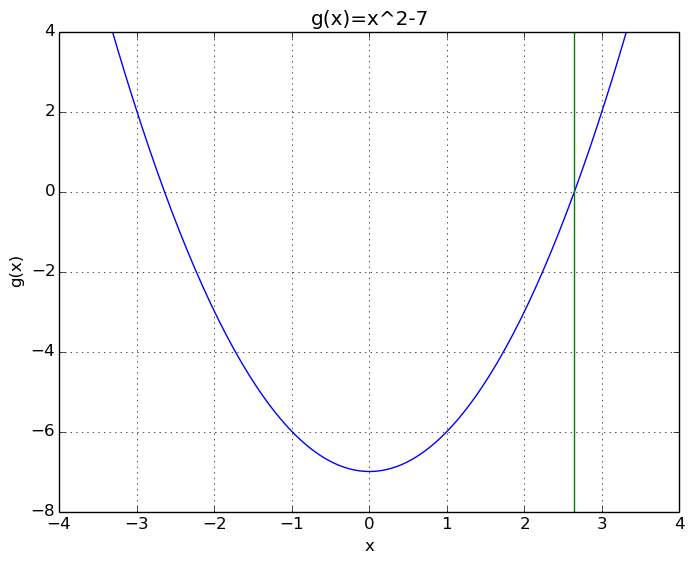

In [19]:
#Graficando la funcion y el resultado obtenido
Pkg.add("PyPlot")
using PyPlot
v=[-4, 4, -8, 4]
x=[-9:0.05:9]
r=[2.6457513110645907 for i=-9:0.05:9]
g=x.^2-7
plot(x,g,r,x)
axis(v)
title("g(x)=x^2-7")
xlabel("x")
ylabel("g(x)")
grid("on")

In [19]:
f(x::DerValue)=x^3-3x^2-25x-8
f(DerValue(7,1))
newton2(f,5,0.001)#Funciona?

6.831144975639854

Busco ahora otra raiz del mismo polinomio, empezare en $x=-4$

In [20]:
f(x::DerValue)=x^3-3x^2-25x-8
f(DerValue(-4,1))
newton2(f,-4,0.001)#Funciona?

-3.4961771837547637

Para la ultima raiz comienzo en $x=0$

In [21]:
f(x::DerValue)=x^3-3x^2-25x-8
f(DerValue(0,1))
newton2(f,0,0.001)#Funciona?

-0.33496779161692886

Se calcularon todas las raices de manera satisfactoria.

El método de Newton puede fallar:

**[4]** Utiliza el mismo método para la función compleja $f(z)=z^3−1$. Empezando desde distintos números complejos a+bi, itera el algoritmo para ver a cuál raíz converge, y colorea el punto inicial de manera correspondiente. [Para esto, se recomienda construir una matriz y utilizar la función pcolor de PyPlot.]

Interpreta el resultado.
Dimensión superior

In [39]:
#Probando el metodo para la funcion compleja
f(x::DerValue)=x^3-1
f(DerValue(0.5,1))
newton2(f,0.5,0.001)
#funciona!

1.0000000000060312

In [40]:
#Probando el metodo para la funcion compleja
f(x::DerValue)=x^3-1
f(DerValue(-1-1im,1))
newton2(f,-1-1im,0.001)#NO OLVIDAR INTRODUCIR EL x0
#Funciona

-0.4999999113699129 - 0.8660249031568892im

In [32]:
M=[-1+(j-1)*0.1+1im-(i*1im-1im)*0.1 for i in 1:21, j in 1:21]#Matriz a evaluar en el algoritmo

21x21 Array{Complex{Float64},2}:
 -1.0+1.0im  -0.9+1.0im  -0.8+1.0im  …  0.8+1.0im  0.9+1.0im  1.0+1.0im
 -1.0+0.9im  -0.9+0.9im  -0.8+0.9im     0.8+0.9im  0.9+0.9im  1.0+0.9im
 -1.0+0.8im  -0.9+0.8im  -0.8+0.8im     0.8+0.8im  0.9+0.8im  1.0+0.8im
 -1.0+0.7im  -0.9+0.7im  -0.8+0.7im     0.8+0.7im  0.9+0.7im  1.0+0.7im
 -1.0+0.6im  -0.9+0.6im  -0.8+0.6im     0.8+0.6im  0.9+0.6im  1.0+0.6im
 -1.0+0.5im  -0.9+0.5im  -0.8+0.5im  …  0.8+0.5im  0.9+0.5im  1.0+0.5im
 -1.0+0.4im  -0.9+0.4im  -0.8+0.4im     0.8+0.4im  0.9+0.4im  1.0+0.4im
 -1.0+0.3im  -0.9+0.3im  -0.8+0.3im     0.8+0.3im  0.9+0.3im  1.0+0.3im
 -1.0+0.2im  -0.9+0.2im  -0.8+0.2im     0.8+0.2im  0.9+0.2im  1.0+0.2im
 -1.0+0.1im  -0.9+0.1im  -0.8+0.1im     0.8+0.1im  0.9+0.1im  1.0+0.1im
 -1.0+0.0im  -0.9+0.0im  -0.8+0.0im  …  0.8+0.0im  0.9+0.0im  1.0+0.0im
 -1.0-0.1im  -0.9-0.1im  -0.8-0.1im     0.8-0.1im  0.9-0.1im  1.0-0.1im
 -1.0-0.2im  -0.9-0.2im  -0.8-0.2im     0.8-0.2im  0.9-0.2im  1.0-0.2im
 -1.0-0.3im  -0.9-0.3im  -0.8-0

Iteré sobre una matriz M que barre los puntos de $-1-i$ a $1+i$, logro encontrar cualquiera de las tres raices en todos los casos salvo cuando se parte del $0$ ya que el metodo se queda estancado en 1.

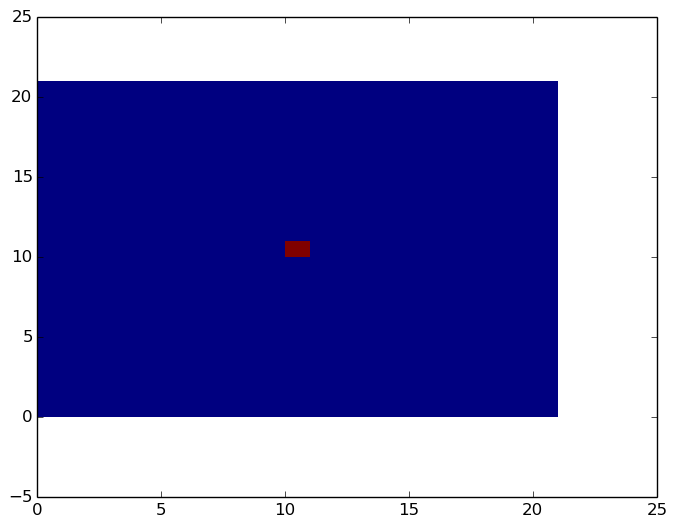

PyObject <matplotlib.collections.PolyCollection object at 0x7f5e79f94dd0>

In [63]:
f(x::DerValue)=x^3-1
x=0
M=[-1+(j-1)*0.1+1im-(i*1im-1im)*0.1 for i in 1:21, j in 1:21]#No borrar esta matriz
A=zeros(Complex{Float64},21,21)#Este es el paso fino al declarar la matriz
for i=1:21
    for j=1:21
        f(DerValue(M[i,j],1))
        x=newton2(f,M[i,j],0.001)
        if abs(x^3-1) < 0.01
            A[i,j]=0
        else
            A[i,j]=1
        end
        #A[i,j]=abs(x^3-1)
        #println(1)
    end
end
using PyPlot
pcolor(A)

Finalmente en la grafica podemos ver que regiones nos llevan a las distintas raices.

INFO: Loading help data...


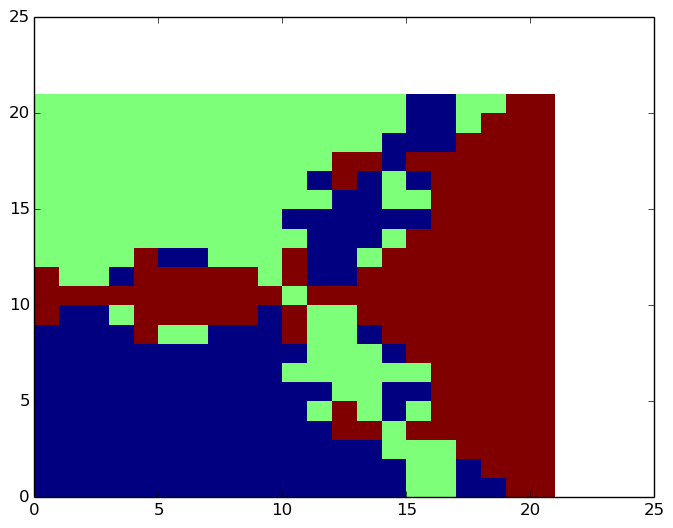

PyObject <matplotlib.collections.PolyCollection object at 0x7fcce6600390>

/usr/lib/python2.7/dist-packages/numpy/ma/core.py:2965: ComplexWarning: Casting complex values to real discards the imaginary part
  output = self._data.astype(newtype).view(type(self))
/usr/lib/pymodules/python2.7/matplotlib/colors.py:909: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin = float(vmin)
/usr/lib/pymodules/python2.7/matplotlib/colors.py:910: ComplexWarning: Casting complex values to real discards the imaginary part
  vmax = float(vmax)


In [18]:
f(x::DerValue)=x^3-1
x=0
M=[-1+(j-1)*0.1+1im-(i*1im-1im)*0.1 for i in 1:21, j in 1:21]#No borrar esta matriz
A=zeros(Complex{Float64},21,21)#Este es el paso fino al declarar la matriz
for i=1:21
    for j=1:21
        f(DerValue(M[i,j],1))
        x=newton2(f,M[i,j],0.001)
        if abs(x^3-1) < 0.01
            if real(x) > 0
                A[i,j]=100
                elseif imag(x) < 0
                A[i,j]=0
            else
                A[i,j]=-100
            end
        else
            A[i,j]=1
        end
        #A[i,j]=abs(x^3-1)
        #println(1)
    end
end
using PyPlot
pcolor(A)